https://www.statbank.dk/KN8Y - veggies data: focus on vegetable categories (e.g., HS_Code 0701–0714)

https://www.naturalearthdata.com/downloads/110m-cultural-vectors/ - Borders and geographic features


In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import glob

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [19]:
# Load the world shapefile
shapefile_path = "data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

# csv path
folder_path = "data/"  

# Find all CSV files 
csv_files = glob.glob(f"{folder_path}/StatisticsDenmark*.csv")

dataframes = {}

for file in csv_files:
    # Extract period and year from the filename
    filename = file.split("/")[-1]  # Get only the filename (remove path)
    parts = filename.replace("StatisticsDenmark", "").replace(".csv", "").split("_")
    
    if len(parts) == 3:  # Ensuring we have both period and year
        period, subperiod, year = parts
        key = f"{period}_{subperiod}_{year}"  # Example: "0701_09_2023"
    else:
        year = parts[-1]
        key = year

    try:
        df = pd.read_csv(file, encoding="ISO-8859-1")
    except UnicodeDecodeError:
        df = pd.read_csv(file, encoding="utf-8")
    
    dataframes[key] = df




In [4]:
dataframes['0701_09_2023']

,Import,2023,07011000 Læggekartofler,I alt,2061912,8409758,0
0,Import,2023,07011000 Læggekartofler,Afghanistan,0,0,0
1,Import,2023,07011000 Læggekartofler,Albanien,0,0,0
2,Import,2023,07011000 Læggekartofler,Algeriet,0,0,0
3,Import,2023,07011000 Læggekartofler,Amerikansk Oceanien,0,0,0
4,Import,2023,07011000 Læggekartofler,Amerikansk Samoa,0,0,0
...,...,...,...,...,...,...,...
32835,Import,2023,"07099990 Grøntsager, fersk/kølet, i.a.n.",Østrig,0,0,0
32836,Import,2023,"07099990 Grøntsager, fersk/kølet, i.a.n.",Diskretioneret,0,0,0
32837,Import,2023,"07099990 Grøntsager, fersk/kølet, i.a.n.",Uoplyst land,0,0,0
32838,Import,2023,"07099990 Grøntsager, fersk/kølet, i.a.n.",Uoplyst land EU-lande,0,0,0


In [20]:
# Define the columns to drop
drop_columns = ["0"]

# Apply transformations to each DataFrame
for key, df in dataframes.items():
    
    # rename columns based on position
    column_names = df.columns.tolist()
    if len(column_names) >= 6:
        rename_map = {
            column_names[1]: "Year",
            column_names[3]: "Country",
            column_names[4]: "KG",
            column_names[5]: "DKK"
        }
        df = df.rename(columns=rename_map)

    # Drop unnecessary columns
    df = df.drop(columns=drop_columns, errors="ignore")


    # Identify the commodity column (the first unknown column — now index 2)
    if len(df.columns) > 2:
        commodity_col = df.columns[2]
        
        # Check if it’s a Series
        if pd.api.types.is_string_dtype(df[commodity_col]):
            df["HS_Code"] = df[commodity_col].str.split(" ", n=1).str[0]
            df["Commodity_Name"] = df[commodity_col].str.split(" ", n=1).str[1]
        
        # Drop original commodity column
        df = df.drop(columns=[commodity_col])

    # Store cleaned DataFrame
    dataframes[key] = df


In [6]:
dataframes['0701_09_2022']

,Import,Year,Country,KG,DKK,HS_Code,Commodity_Name
0,Import,2022,Afghanistan,0,0,07011000,Læggekartofler
1,Import,2022,Albanien,0,0,07011000,Læggekartofler
2,Import,2022,Algeriet,0,0,07011000,Læggekartofler
3,Import,2022,Amerikansk Oceanien,0,0,07011000,Læggekartofler
4,Import,2022,Amerikansk Samoa,0,0,07011000,Læggekartofler
...,...,...,...,...,...,...,...
32835,Import,2022,Østrig,428,9707,07099990,"Grøntsager, fersk/kølet, i.a.n."
32836,Import,2022,Diskretioneret,0,0,07099990,"Grøntsager, fersk/kølet, i.a.n."
32837,Import,2022,Uoplyst land,0,0,07099990,"Grøntsager, fersk/kølet, i.a.n."
32838,Import,2022,Uoplyst land EU-lande,0,0,07099990,"Grøntsager, fersk/kølet, i.a.n."


In [22]:
# Combine both 0701_09 and 0710_14 datasets - each year
merged_df = pd.concat(
    [df for key, df in dataframes.items() if key.startswith(("0701_09_", "0710_14_"))],
    ignore_index=True
)
merged_df[38000:]

,Import,Year,Country,KG,DKK,HS_Code,Commodity_Name
38000,Import,2023,Guadeloupe,0,0,07031019,"Spiseløg, friske eller kølede (undtagen i form..."
38001,Import,2023,Guam,0,0,07031019,"Spiseløg, friske eller kølede (undtagen i form..."
38002,Import,2023,Guatemala,0,0,07031019,"Spiseløg, friske eller kølede (undtagen i form..."
38003,Import,2023,Guinea,0,0,07031019,"Spiseløg, friske eller kølede (undtagen i form..."
38004,Import,2023,Guinea-Bissau,0,0,07031019,"Spiseløg, friske eller kølede (undtagen i form..."
...,...,...,...,...,...,...,...
237083,Import,2020,Østrig,0,0,07149090,Jordskokker og lignende rødder og rodknolde me...
237084,Import,2020,Diskretioneret,0,0,07149090,Jordskokker og lignende rødder og rodknolde me...
237085,Import,2020,Uoplyst land,0,0,07149090,Jordskokker og lignende rødder og rodknolde me...
237086,Import,2020,Uoplyst land EU-lande,0,0,07149090,Jordskokker og lignende rødder og rodknolde me...


In [8]:
# Define statistical/non-geographic categories
stat_categories = [
    "Diskretioneret",
    "Uoplyst land",
    "Uoplyst land EU-lande",
    "Uoplyst land 3. Lande",
    "I alt"
]

# Create a separate DataFrame for these categories
stat_df = merged_df[merged_df["Country"].isin(stat_categories)]

# Remove them from the original DataFrame
merged_df = merged_df[~merged_df["Country"].isin(stat_categories)]

# Save the cleaned datasets
stat_df.to_csv("data/veggies_stat_categories.csv", index=False)
merged_df.to_csv("data/veggies_cleaned.csv", index=False)

# Display statistics for Kg and DKK in the stat_df
stat_summary = stat_df.groupby("Country")[["KG", "DKK"]].sum()
print(stat_summary)


                               DKK
Country                           
Diskretioneret                   0
I alt                  15999167295
Uoplyst land                     0
Uoplyst land 3. Lande       246470
Uoplyst land EU-lande            0


In [9]:
# Load the world shapefile
world = gpd.read_file(shapefile_path)

# Keep only relevant columns
world = world[["ADMIN", "ISO_A3", "POP_EST", "GDP_MD", "CONTINENT", "REGION_UN", "SUBREGION", "geometry"]]
world.head()

,ADMIN,ISO_A3,POP_EST,GDP_MD,CONTINENT,REGION_UN,SUBREGION,geometry
0,Fiji,FJI,889953.0,5496,Oceania,Oceania,Melanesia,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,58005463.0,63177,Africa,Africa,Eastern Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,ESH,603253.0,907,Africa,Africa,Northern Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,37589262.0,1736425,North America,Americas,Northern America,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,328239523.0,21433226,North America,Americas,Northern America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [23]:
#Thank You ChatGPT :-D
country_map = {
    "Afghanistan": "Afghanistan",
    "Albanien": "Albania",
    "Algeriet": "Algeria",
    "Amerikansk Samoa": "American Samoa",
    "Amerikanske Jomfruøer": "United States Virgin Islands",
    "Andorra": "Andorra",
    "Angola": "Angola",
    "Anguilla": "Anguilla",
    "Antarktis": "Antarctica",
    "Antigua og Barbuda": "Antigua and Barbuda",
    "Argentina": "Argentina",
    "Armenien": "Armenia",
    "Aruba": "Aruba",
    "Aserbajdsjan": "Azerbaijan",
    "Australien": "Australia",
    "Bahamas": "The Bahamas",
    "Bahrain": "Bahrain",
    "Bangladesh": "Bangladesh",
    "Barbados": "Barbados",
    "Belgien": "Belgium",
    "Belize": "Belize",
    "Benin": "Benin",
    "Bermuda": "Bermuda",
    "Bhutan": "Bhutan",
    "Bolivia": "Bolivia",
    "Bosnien-Hercegovina": "Bosnia and Herzegovina",
    "Botswana": "Botswana",
    "Bouvetøen": "Bouvet Island",
    "Brasilien": "Brazil",
    "Britiske territorium i det Indiske Ocean": "British Indian Ocean Territory",
    "Brunei": "Brunei",
    "Bulgarien": "Bulgaria",
    "Burkina Faso": "Burkina Faso",
    "Burundi": "Burundi",
    "Cambodja": "Cambodia",
    "Cameroun": "Cameroon",
    "Canada": "Canada",
    "Centralafrikanske Republik": "Central African Republic",
    "Chile": "Chile",
    "Colombia": "Colombia",
    "Congo, Republikken": "Republic of the Congo",
    "Congo, Demokratiske Republik": "Democratic Republic of the Congo",
    "Cookøerne": "Cook Islands",
    "Costa Rica": "Costa Rica",
    "Cuba": "Cuba",
    "Curacao": "Curaçao",
    "Cypern": "Cyprus",
    "Dominikanske Republik": "Dominican Republic",
    "Djibouti": "Djibouti",
    "Dominica": "Dominica",
    "Ecuador": "Ecuador",
    "Egypten": "Egypt",
    "El Salvador": "El Salvador",
    "Elfenbenskysten": "Ivory Coast",
    "Eritrea": "Eritrea",
    "Estland": "Estonia",
    "Etiopien": "Ethiopia",
    "Falklandsøerne": "Falkland Islands",
    "Fiji": "Fiji",
    "Filippinerne": "Philippines",
    "Finland": "Finland",
    "Forenede Arabiske Emirater": "United Arab Emirates",
    "Frankrig og Monaco": "France",
    "Franske besiddelser i det sydlige Indiske Ocean": "French Southern and Antarctic Lands",
    "Gabon": "Gabon",
    "Gambia": "Gambia",
    "Georgien": "Georgia",
    "Ghana": "Ghana",
    "Gibraltar": "Gibraltar",
    "Grækenland": "Greece",
    "Grønland": "Greenland",
    "Guatemala": "Guatemala",
    "Guinea": "Guinea",
    "Guinea-Bissau": "Guinea-Bissau",
    "Guyana": "Guyana",
    "Haiti": "Haiti",
    "Heard- og McDonaldøerne": "Heard Island and McDonald Islands",
    "Honduras": "Honduras",
    "Hongkong": "Hong Kong",
    "Belarus": "Belarus",
    "Indien": "India",
    "Indonesien": "Indonesia",
    "Irak": "Iraq",
    "Iran": "Iran",
    "Irland": "Ireland",
    "Island": "Iceland",
    "Israel": "Israel",
    "Italien": "Italy",
    "Jamaica": "Jamaica",
    "Japan": "Japan",
    "Jordan": "Jordan",
    "Kap Verde": "Cape Verde",
    "Kasakhstan": "Kazakhstan",
    "Kenya": "Kenya",
    "Kina": "China",
    "Kirgisistan": "Kyrgyzstan",
    "Kosovo": "Kosovo",
    "Kroatien": "Croatia",
    "Kuwait": "Kuwait",
    "Laos": "Laos",
    "Lesotho": "Lesotho",
    "Letland": "Latvia",
    "Libanon": "Lebanon",
    "Liberia": "Liberia",
    "Libyen": "Libya",
    "Litauen": "Lithuania",
    "Luxembourg": "Luxembourg",
    "Macao": "Macau",
    "Madagaskar": "Madagascar",
    "Nordmakedonien": "North Macedonia",
    "Malawi": "Malawi",
    "Malaysia": "Malaysia",
    "Mali": "Mali",
    "Marokko": "Morocco",
    "Mauritanien": "Mauritania",
    "Mauritius": "Mauritius",
    "Mexico": "Mexico",
    "Moldova": "Moldova",
    "Mongoliet": "Mongolia",
    "Montenegro": "Montenegro",
    "Mozambique": "Mozambique",
    "Myanmar": "Myanmar",
    "Namibia": "Namibia",
    "Nepal": "Nepal",
    "New Zealand": "New Zealand",
    "Nederlandene": "Netherlands",
    "Nicaragua": "Nicaragua",
    "Niger": "Niger",
    "Nigeria": "Nigeria",
    "Nordkorea": "North Korea",
    "Norge": "Norway",
    "Oman": "Oman",
    "Pakistan": "Pakistan",
    "Panama": "Panama",
    "Papua Ny Guinea": "Papua New Guinea",
    "Paraguay": "Paraguay",
    "Peru": "Peru",
    "Polen": "Poland",
    "Portugal": "Portugal",
    "Qatar": "Qatar",
    "Rumænien": "Romania",
    "Rusland": "Russia",
    "Rwanda": "Rwanda",
    "Sydafrika": "South Africa",
    "Sverige": "Sweden",
    "Schweiz": "Switzerland",
    "Spanien": "Spain",
    "Tanzania": "United Republic of Tanzania",
    "Thailand": "Thailand",
    "Togo": "Togo",
    "Tyrkiet": "Turkey",
    "Tyskland": "Germany",
    "Uganda": "Uganda",
    "Ukraine": "Ukraine",
    "Ungarn": "Hungary",
    "USA": "United States of America",
    "Venezuela": "Venezuela",
    "Vietnam": "Vietnam",
    "Zimbabwe": "Zimbabwe",
    "Østrig": "Austria",
    "Serbien": "Republic of Serbia",
    "Slovakiet": "Slovakia",
    "Slovenien": "Slovenia",
    "Storbritannien": "United Kingdom",
    "Eswantini": "eSwatini",
    "Sydkorea": "South Korea",
    "Sydsudan": "South Sudan",
    "Syrien": "Syria",
    "Tadsjikistan": "Tajikistan",
    "Tchad": "Chad",
    "Tjekkiet": "Czechia",
    "Tunesien": "Tunisia",
    "Usbekistan": "Uzbekistan",
    "Vatikanstaten": "Vatican City",
    "Vestsahara": "Western Sahara",
    "Ækvatorialguinea": "Equatorial Guinea",
    "Østtimor": "East Timor",
    "Salomonøerne": "Solomon Islands",
    "Ny Kaledonien": "New Caledonia",
    'Saudi-Arabien': 'Saudi Arabia',
    'Senegal': 'Senegal',
    'Sierra Leone': 'Sierra Leone',
    'Somalia': 'Somalia',
    'Sri Lanka': 'Sri Lanka',
    'Sudan': 'Sudan',
    'Suriname': 'Suriname',
    'Taiwan': 'Taiwan',
    'Trinidad og Tobago': 'Trinidad and Tobago',
    'Turkmenistan': 'Turkmenistan',
    'Uruguay': 'Uruguay',
    'Vanuatu': 'Vanuatu',
    'Yemen': 'Yemen',
    'Zambia': 'Zambia',
    'Vestbredden og Gaza': 'Palestine',  # West Bank and Gaza corresponds to Palestine
    'Færøerne': 'Denmark',  # Faroe Islands are part of Denmark
    
    
    
    
    'Amerikansk Oceanien': 'United States of America',
    'Amerikansk Samoa': 'United States of America',
    'Amerikanske Jomfruøer': 'United States of America',
    'Andorra': 'Andorra',
    'Anguilla': 'United Kingdom',
    'Antigua og Barbuda': 'Antigua and Barbuda',
    'Aruba': 'Netherlands',
    'Australsk Oceanien': 'Australia',
    'Bahrain': 'Bahrain',
    'Barbados': 'Barbados',
    'Bermuda': 'United Kingdom',
    'Bonaire, Sint Eustatius og Saba': 'Netherlands',
    'Bouvetøen': 'Norway',
    'Britisk Oceanien': 'United Kingdom',
    'Britiske Jomfruøer': 'United Kingdom',
    'Britiske territorium i det Indiske Ocean': 'United Kingdom',
    'Caymanøerne': 'United Kingdom',
    'Ceuta': 'Spain',
    'Cocosøerne': 'Australia',
    'Comorerne': 'Comoros',
    'Cookøerne': 'New Zealand',
    'Curacao': 'Netherlands',
    'DDR': 'Germany',
    'Dominica': 'Dominica',
    'Fransk Guyana': 'France',
    'Fransk Polynesien': 'France',
    'Fremmede tropper i Tyskland': 'Germany',
    'Gaza og Jericho': 'Palestine',
    'Gibraltar': 'United Kingdom',
    'Grenada': 'Grenada',
    'Guadeloupe': 'France',
    'Guam': 'United States of America',
    'Heard- og McDonaldøerne': 'Australia',
    'Hongkong': 'China',
    'Jugoslavien': 'Serbia',  # Historical country, now split
    'Juleøen': 'Australia',
    'Kanariske Øer': 'Spain',
    'Kap Verde': 'Cabo Verde',
    'Liechtenstein': 'Liechtenstein',
    'Macao': 'China',
    'Maldiverne': 'Maldives',
    'Malta': 'Malta',
    'Marshalløerne': 'Marshall Islands',
    'Martinique': 'France',
    'Mauritius': 'Mauritius',
    'Mayotte': 'France',
    'Melilla': 'Spain',
    'Mikronesiske Stater': 'Federated States of Micronesia',
    'Montenegro (2005-2006)': 'Montenegro',
    'Montserrat': 'United Kingdom',
    'Nauru': 'Nauru',
    'Nederlandske Antiller': 'Netherlands',  # Dissolved into Aruba, Curaçao, etc.
    'New Zealandsk Oceanien': 'New Zealand',
    'Niue': 'New Zealand',
    'Nordmarianerne': 'United States of America',
    'Norfolkøen': 'Australia',
    'Palau': 'Palau',
    'Panamakanalzonen': 'Panama',
    'Pitcairn': 'United Kingdom',
    'Polarområder': 'Antarctica',
    'Portugisisk Timor': 'East Timor',
    'Puerto Rico': 'United States of America',
    'Reunion': 'France',
    'Saint-Barthelemy': 'France',
    'Samoa': 'Samoa',
    'San Marino': 'San Marino',
    'Sao Tomé og Principe': 'São Tomé and Príncipe',
    'Seychellerne': 'Seychelles',
    'Singapore': 'Singapore',
    'Skt. Helena': 'United Kingdom',
    'Skt. Kitts og Nevis': 'Saint Kitts and Nevis',
    'Skt. Lucia': 'Saint Lucia',
    'Skt. Martin (NL)': 'Netherlands',
    'Skt. Pierre og Miquelon': 'France',
    'Skt. Vincent og Grenadinerne': 'Saint Vincent and the Grenadines',
    'South Georgia og De Sydlige Sandwichøer': 'United Kingdom',
    'Sovjetunionen': 'Russia',  # Historical country
    'Svalbard': 'Norway',
    'Sydyemen': 'Yemen',
    'Tjekkoslovakiet': 'Czechia',  # Historical country
    'Tokelau': 'New Zealand',
    'Tonga': 'Tonga',
    'Turks- og Caicosøerne': 'United Kingdom',
    'Tuvalu': 'Tuvalu',
    'USAs mindre øbesiddelser': 'United States of America',
    'Vatikanstaten': 'Vatican City',
    'Vestindiske Øer': 'United States of America',  # Danish West Indies, now part of US Virgin Islands
    'Wallis og Futuna': 'France'

    
}
# Apply mapping
merged_df["Country_official"] = merged_df["Country"].map(country_map)
merged_df.head()

,Import,Year,Country,KG,DKK,HS_Code,Commodity_Name,Country_official
0,Import,2020,Afghanistan,0,0,07011000,Læggekartofler,Afghanistan
1,Import,2020,Albanien,0,0,07011000,Læggekartofler,Albania
2,Import,2020,Algeriet,0,0,07011000,Læggekartofler,Algeria
3,Import,2020,Amerikansk Oceanien,0,0,07011000,Læggekartofler,United States of America
4,Import,2020,Amerikansk Samoa,0,0,07011000,Læggekartofler,United States of America


In [11]:
# Extract unique country names from the world dataset
world_countries = set(world["ADMIN"].unique())

# Extract country names from the country_map dictionary values
mapped_countries = set(country_map.values())

# Find countries in the mapping that do not exist in world["ADMIN"]
unmatched_countries = mapped_countries - world_countries

# Print results
#print(unmatched_countries)
country_map = {key: value for key, value in country_map.items() if value not in unmatched_countries}


print(len(world["ADMIN"].unique()[:]))  # Check country names in the shapefile
print(len(merged_df["Country"].unique()[:]) ) # Check country names in veggies data
print(len(country_map))

177
262
234


In [12]:

# Check if any names are still unmapped
unmapped = merged_df[merged_df["Country_official"].isna()]
print(unmapped["Country"].unique())  # Find missing mappings
print(len(unmapped["Country"].unique()))  # Find missing mappings


['Sao Tomé og  Principe']
1


In [13]:
# Convert relevant columns to numeric (if needed)
merged_df["KG"] = pd.to_numeric( merged_df["KG"], errors="coerce").fillna(0)
merged_df["DKK"] = pd.to_numeric( merged_df["DKK"], errors="coerce").fillna(0)

countries_to_check = unmapped["Country"].unique()
# Filter for relevant countries with non-zero KG or DKK values
filtered_df = merged_df[
    merged_df["Country"].isin(countries_to_check) & 
    ((merged_df["KG"] > 0) | (merged_df["DKK"] > 0))
]
filtered_df

,Import,Year,Country,KG,DKK,HS_Code,Commodity_Name,Country_official


In [14]:
# Merge on English country names
ALL_df = merged_df.merge(world, left_on="Country_official", right_on="ADMIN", how="left")
ALL_df.head()

,Import,Year,Country,KG,DKK,HS_Code,Commodity_Name,Country_official,ADMIN,ISO_A3,POP_EST,GDP_MD,CONTINENT,REGION_UN,SUBREGION,geometry
0,Import,2020,Afghanistan,0.0,0,07011000,Læggekartofler,Afghanistan,Afghanistan,AFG,38041754.0,19291.0,Asia,Asia,Southern Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Import,2020,Albanien,0.0,0,07011000,Læggekartofler,Albania,Albania,ALB,2854191.0,15279.0,Europe,Europe,Southern Europe,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,Import,2020,Algeriet,0.0,0,07011000,Læggekartofler,Algeria,Algeria,DZA,43053054.0,171091.0,Africa,Africa,Northern Africa,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,Import,2020,Amerikansk Oceanien,0.0,0,07011000,Læggekartofler,United States of America,United States of America,USA,328239523.0,21433226.0,North America,Americas,Northern America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
4,Import,2020,Amerikansk Samoa,0.0,0,07011000,Læggekartofler,United States of America,United States of America,USA,328239523.0,21433226.0,North America,Americas,Northern America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [15]:
ALL_df["geometry"]

0         POLYGON ((66.51861 37.36278, 67.07578 37.35614...
1         POLYGON ((21.02004 40.84273, 20.99999 40.58000...
2         POLYGON ((-8.68440 27.39574, -8.66512 27.58948...
3         MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
4         MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                                ...                        
232651    POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...
232652    POLYGON ((31.19141 -22.25151, 30.65987 -22.151...
232653    POLYGON ((9.64916 2.28387, 11.27645 2.26105, 1...
232654    POLYGON ((124.96868 -8.89279, 125.08625 -8.656...
232655    POLYGON ((16.97967 48.12350, 16.90375 47.71487...
Name: geometry, Length: 232656, dtype: geometry

In [16]:
ALL_df.to_csv("merged_data.csv", index=False)

In [17]:

gdf = gpd.GeoDataFrame(ALL_df, geometry="geometry", crs="EPSG:4326")  # Set correct CRS if known

# Verify it's now a GeoDataFrame
print(type(gdf))  # Should output: <class 'geopandas.geodataframe.GeoDataFrame'>
print(gdf.crs)  # Check CRS
print(gdf.geometry.type.value_counts())  # Check geometry types




<class 'geopandas.geodataframe.GeoDataFrame'>
epsg:4326
Polygon         142968
MultiPolygon     64824
dtype: int64


In [18]:
from shapely.geometry import Point, Polygon

# Example: First geometry in the dataset
geometry = gdf.geometry.iloc[0]

# Geometric properties
print(geometry)
print("Centroid:", geometry.centroid)
print("Area:", geometry.area)
print("Bounds:", geometry.bounds)


POLYGON ((66.51860680528867 37.36278432875879, 67.07578209825962 37.35614390720929, 67.82999962755952 37.144994004864685, 68.13556237170138 37.02311513930431, 68.85944583524594 37.344335842430596, 69.19627282092438 37.15114350030743, 69.51878543485796 37.60899669041342, 70.11657840361033 37.58822276463209, 70.27057417184014 37.735164699854025, 70.3763041523093 38.13839590102752, 70.80682050973289 38.486281643216415, 71.34813113799026 38.25890534113216, 71.23940392444817 37.953265082341886, 71.54191775908478 37.905774441065645, 71.44869347523024 37.06564484308052, 71.8446382994506 36.73817129164692, 72.1930408059624 36.948287665345674, 72.63688968291729 37.047558091778356, 73.26005577992501 37.495256862939, 73.9486959166465 37.4215662704908, 74.98000247589542 37.419990139305895, 75.15802778514092 37.13303091078912, 74.57589277537298 37.02084137628346, 74.06755171091783 36.83617564548845, 72.92002485544447 36.72000702569632, 71.84629194528392 36.50994232842986, 71.26234826038575 36.07438

In [18]:
# Verify CRS
print(gdf.crs)  # Should return something like 'EPSG:4326' (WGS 84)

# If CRS is missing, set it explicitly
if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)


epsg:4326


In [19]:
# Convert to a Projected CRS (example: UTM Zone 32N for Denmark)
gdf_projected = gdf.to_crs(epsg=25832)

# Check CRS after transformation
print(gdf_projected.crs)


epsg:25832


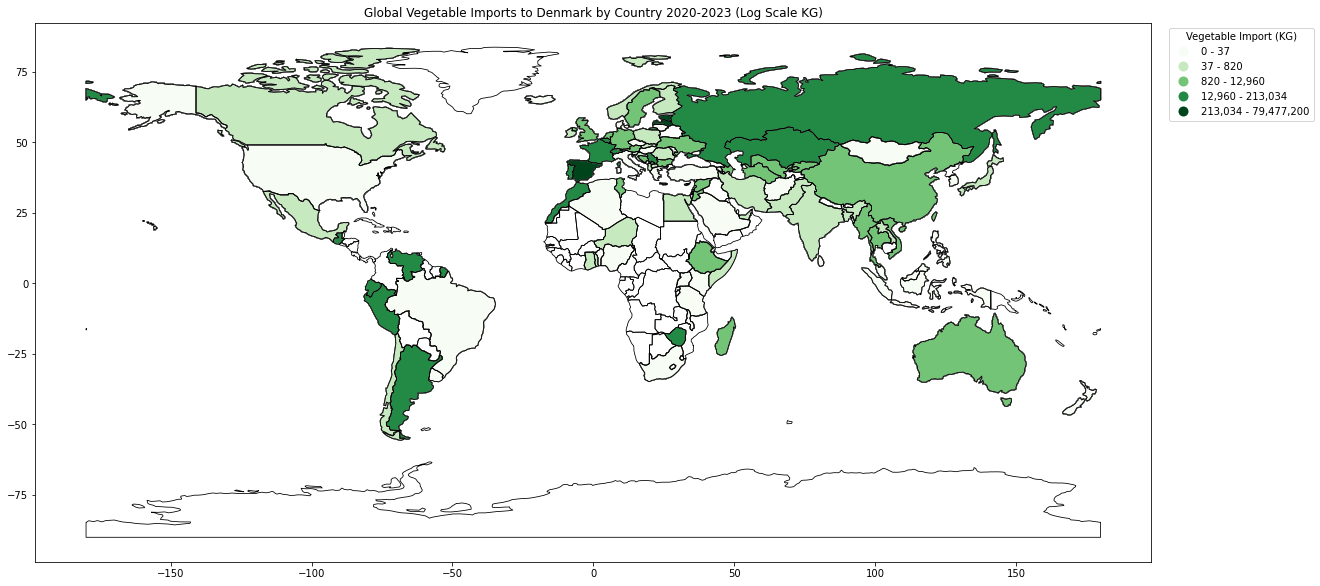

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc

# Remove missing values and zero imports
gdf_clean = gdf.dropna(subset=["geometry", "KG"])
gdf_clean = gdf_clean[gdf_clean["KG"] > 0]

# Apply log transformation
gdf_clean["log_KG"] = np.log1p(gdf_clean["KG"])  # log(1+KG) to handle zero cases

# Define classification on log values
classifier = mc.NaturalBreaks(gdf_clean["log_KG"], k=5)  # Using Jenks for natural groupings

# Plot choropleth
fig, ax = plt.subplots(figsize=(20, 12))
gdf_clean.plot(column="log_KG", cmap="Greens", legend=True, edgecolor="gray",
               scheme="natural_breaks", classification_kwds={"k": 5}, ax=ax)

# Customize legend labels with actual KG values
bin_edges = np.exp(classifier.bins)  # Reverse log transformation to get real-world values
legend_labels = [f"{int(low):,} - {int(high):,}" for low, high in zip([0] + bin_edges[:-1].tolist(), bin_edges.tolist())]

# Move legend outside the plot
leg = ax.get_legend()
leg.set_title("Vegetable Import (KG)")
leg.set_bbox_to_anchor((1.15, 1))  # Move legend to the right outside the plot
for text, label in zip(leg.get_texts(), legend_labels):
    text.set_text(label)  # Replace log values with real KG values

# Add natural Earth coastlines and country borders**
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))  # Load world borders
world.boundary.plot(ax=ax, edgecolor="black", linewidth=0.8)  # Add country borders

plt.title("Global Vegetable Imports to Denmark by Country 2020-2023 (Log Scale KG)")
plt.show()
